<span style="font-size:large;">
<div style="text-align: right">CSTS-UH 1078 <b>Networks</b><br/>
Faculty: <b>Moses Boudourides</b><br/>
Fall Semester 2019<br/>
New York University Abu Dhabi</div>

## <span style="color:red">EXPERIMENT 1</span>
# <span style="color:green">Networks of Hyperlinked Wikipedia Pages</span>

<span style="font-size:large;">
    
* Here, in the beginning, one is selecting a Wikipedia page through a random generator of wikipedia pages.
    
* However, one may start with a predifined Wikipedia page of one's own choice. In this case, one needs to modify Cell 7 below.

* Subsequently, the goal is to find the set of hyperlinks of the original (random) page to other Wikipedia webpages and the graph (directed network) which is formed by all the hyperlinks among the latter webpages.

* To be able to controll the size of this graph, one should set the minimum and the maximum number of hyperlinks from the original (random) page into a fixed interval of values (parameters n and N below).

* At the very end, after running all cells of this notebook, what is plotted is the directed network among hyperlinked Wikipedia pages (alters), all of which are pointed from the randomly selected starting Wikipedia page (the ego). In other words, this is an example of the directed **alter-net** corresponding to a directed **ego-net**. 

In [1]:
# Run the following IN A TERMINAL

# conda install -c conda-forge wikipedia

# conda install -c alubbock pygraphviz

In [2]:
import wikipedia
import random
import networkx as nx
import matplotlib.pyplot as plt
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
import warnings; warnings.simplefilter('ignore')

In [3]:
n=10  # minimum number of hyperlinks of the selected wikipedia page
N=31  # maximum number of hyperlinks of the selected wikipedia page

### Random Selection of a Wikipedia Page

In [4]:
# If this cell runs very slowly, take lower values of n and N.

while True:
    try:
        page=wikipedia.page(wikipedia.random())
    except wikipedia.DisambiguationError as e:
        pass
    except wikipedia.exceptions.PageError as e:
        pass
    hl=sorted([w.replace(" ","_") for w in page.links])
    if len(hl)>n and len(hl)<N:
        break

# if len(page.links) > N-1:
#     print "The (randomly) selected '%s' Wikipedia page has totally %i hyperlinks:" %(page.title,len(page.links))
#     print

p=sorted([w.replace(" ","_") for w in page.links])

print "The %i hyperlinks from the (randomly) selected '%s' Wikipedia page are:" %(len(p),page.title)
print
for i in range(len(p)):
    print "%i. %s" %(i+1,p[i])

The 16 hyperlinks from the (randomly) selected 'Fallenbacherspitze' Wikipedia page are:

1. Alpine_Club_Guide
2. Bach_(Tirol)
3. Climbing_grade
4. Feuerspitze
5. Freispitze
6. Geographic_coordinate_system
7. Holzgauer_Wetterspitze
8. International_Standard_Book_Number
9. Lechtal_Alps
10. Metres_above_the_Adriatic
11. Mountain_range
12. Summit
13. Topographic_isolation
14. Topographic_prominence
15. Tyrol_(state)
16. Vorderseespitze


In [5]:
eds=[]
for pp in p:
    try:
        ppp=sorted([w.replace(" ","_") for w in wikipedia.page(pp).links])
    except wikipedia.exceptions.PageError as e:
        pass
    ppp=[x for x in ppp if x!=pp]
    ih=set(ppp).intersection(set(p))
    if len(ih)>0:
        print "%s has %i hyperlinks to webpages: \n %s" %(pp,len(ih),", ".join(list(ih)))
        print
        for q in ih:
            eds.append((pp,q))

Climbing_grade has 1 hyperlinks to webpages: 
 International_Standard_Book_Number

Feuerspitze has 8 hyperlinks to webpages: 
 Tyrol_(state), Lechtal_Alps, Mountain_range, Geographic_coordinate_system, Topographic_isolation, Topographic_prominence, Summit, Holzgauer_Wetterspitze

Freispitze has 6 hyperlinks to webpages: 
 Tyrol_(state), Mountain_range, Geographic_coordinate_system, Vorderseespitze, Summit, Holzgauer_Wetterspitze

Geographic_coordinate_system has 1 hyperlinks to webpages: 
 International_Standard_Book_Number

Holzgauer_Wetterspitze has 8 hyperlinks to webpages: 
 Tyrol_(state), Lechtal_Alps, Mountain_range, Geographic_coordinate_system, Feuerspitze, Topographic_isolation, Topographic_prominence, Summit

Lechtal_Alps has 7 hyperlinks to webpages: 
 Tyrol_(state), Mountain_range, Geographic_coordinate_system, Freispitze, Vorderseespitze, Summit, Holzgauer_Wetterspitze

Metres_above_the_Adriatic has 1 hyperlinks to webpages: 
 Geographic_coordinate_system

Topographic_isol

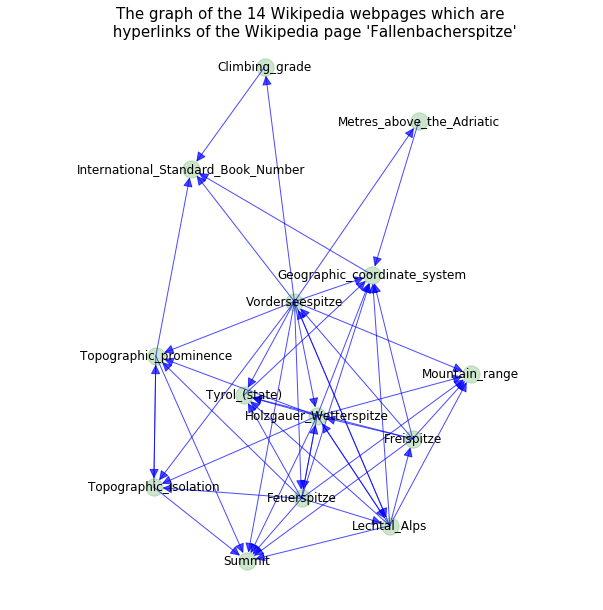

In [6]:
G=nx.DiGraph()
G.add_edges_from(eds)
# print len(G.nodes()),len(G.edges())

pos=graphviz_layout(G)

# pos=nx.spring_layout(G,1.)

plt.figure(figsize=(10,10));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.2)
nx.draw_networkx_edges(G, pos,arrowsize=20, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
ss="The graph of the %i Wikipedia webpages which are \n hyperlinks of the Wikipedia page '%s'" %(len(G.nodes()),page.title)
plt.title(ss,fontsize=15);
plt.margins(x=0.3, y=0) 

### Using a Predefined Wikipedia Page

In [7]:
# IF ONE WANTS TO USE A PREDEFINED WEBPAGE, 
# one should uncomment and run the following lines
# Here, I've considered as predefined Wikipedia page the page of the
# 'United_States_women%27s_national_soccer_team' but you may take
# instead anything you like. Notice, that subsequently I am filtering
# a random sample of 20 hyperlinks. This might need to change if the
# page you have selected has fewer hyperlinks.

page=wikipedia.page('United_States_women%27s_national_soccer_team') #'https://en.wikipedia.org/wiki/United_States_women%27s_national_soccer_team'

print "The Wikipedia page '%s' has totally %i hyperlinks:" %(page.title,len(page.links))
print

number_of_hyperlinks = 20
p=random.sample(sorted([w.replace(" ","_") for w in page.links]),number_of_hyperlinks)

print "The %i randomly selected hyperlinks from the Wikipedia page '%s' are:" %(len(p),page.title)
print
for i in range(len(p)):
    print "%i. %s" %(i+1,p[i])

The Wikipedia page 'United States women's national soccer team' has totally 935 hyperlinks:

The 20 randomly selected hyperlinks from the Wikipedia page 'United States women's national soccer team' are:

1. Heather_O'Reilly
2. Mia_Hamm
3. Tom_Brady
4. Mo'ne_Davis
5. Staci_Wilson
6. USSF_Division_2_Professional_League
7. Abrams_Books
8. Football_at_the_2000_Summer_Olympics
9. Aly_Wagner
10. Antigua_and_Barbuda_women's_national_football_team
11. Denmark_women's_national_football_team
12. Mexico–United_States_soccer_rivalry
13. Canada–United_States_sports_rivalries
14. North_American_Soccer_League_(1968–84)
15. Steffi_Graf
16. Paisley,_Scotland
17. Soccer
18. Chiquita_Cup
19. Chicago_Red_Stars
20. SEC_Storied


In [8]:
eds=[]
for pp in p:
    try:
        ppp=sorted([w.replace(" ","_") for w in wikipedia.page(pp).links])
    except wikipedia.exceptions.PageError as e:
        pass
    ppp=[x for x in ppp if x!=pp]
    ih=set(ppp).intersection(set(p))
    if len(ih)>0:
        print "%s has %i hyperlinks to webpages: \n %s" %(pp,len(ih),", ".join(list(ih)))
        print
        for q in ih:
            eds.append((pp,q))

Heather_O'Reilly has 3 hyperlinks to webpages: 
 Denmark_women's_national_football_team, Aly_Wagner, Mia_Hamm

Mia_Hamm has 6 hyperlinks to webpages: 
 Heather_O'Reilly, Denmark_women's_national_football_team, Staci_Wilson, Football_at_the_2000_Summer_Olympics, Steffi_Graf, Aly_Wagner

Mo'ne_Davis has 1 hyperlinks to webpages: 
 Steffi_Graf

Staci_Wilson has 1 hyperlinks to webpages: 
 Mia_Hamm

USSF_Division_2_Professional_League has 1 hyperlinks to webpages: 
 North_American_Soccer_League_(1968–84)

Football_at_the_2000_Summer_Olympics has 1 hyperlinks to webpages: 
 Mia_Hamm

Aly_Wagner has 3 hyperlinks to webpages: 
 Heather_O'Reilly, Denmark_women's_national_football_team, Mia_Hamm

Canada–United_States_sports_rivalries has 1 hyperlinks to webpages: 
 Mexico–United_States_soccer_rivalry

Steffi_Graf has 2 hyperlinks to webpages: 
 Mia_Hamm, Mo'ne_Davis

Chiquita_Cup has 19 hyperlinks to webpages: 
 Heather_O'Reilly, Denmark_women's_national_football_team, Soccer, Chicago_Red_Stars

In [ ]:
G=nx.DiGraph()
G.add_edges_from(eds)
# print len(G.nodes()),len(G.edges())

pos=graphviz_layout(G)

# pos=nx.spring_layout(G,1.)

plt.figure(figsize=(10,10));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.2)
nx.draw_networkx_edges(G, pos,arrowsize=20, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
ss="The graph of the %i Wikipedia webpages which are \n hyperlinks of the Wikipedia page '%s'" %(len(G.nodes()),page.title)
plt.title(ss,fontsize=15);
plt.margins(x=0.3, y=0) 

### Fewer Nodes

In [ ]:
number_of_hyperlinks = 12
p=random.sample(sorted([w.replace(" ","_") for w in page.links]),number_of_hyperlinks)

print "The %i randomly selected hyperlinks from the Wikipedia page '%s' are:" %(len(p),page.title)
print
for i in range(len(p)):
    print "%i. %s" %(i+1,p[i])

In [ ]:
eds=[]
for pp in p:
    try:
        ppp=sorted([w.replace(" ","_") for w in wikipedia.page(pp).links])
    except wikipedia.exceptions.PageError as e:
        pass
    ppp=[x for x in ppp if x!=pp]
    ih=set(ppp).intersection(set(p))
    if len(ih)>0:
        print "%s has %i hyperlinks to webpages: \n %s" %(pp,len(ih),", ".join(list(ih)))
        print
        for q in ih:
            eds.append((pp,q))

In [ ]:
G=nx.DiGraph()
G.add_edges_from(eds)
# print len(G.nodes()),len(G.edges())

pos=graphviz_layout(G)

# pos=nx.spring_layout(G,1.)

plt.figure(figsize=(10,10));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.2)
nx.draw_networkx_edges(G, pos,arrowsize=20, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
ss="The graph of the %i Wikipedia webpages which are \n hyperlinks of the Wikipedia page '%s'" %(len(G.nodes()),page.title)
plt.title(ss,fontsize=15);
plt.margins(x=0.3, y=0) 